# **Spam Classifier in Machine Learning**

In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the data
df = pd.read_csv("SMSSpamCollection.csv", sep='\t', names=['label','email'])

In [3]:
# lets try to look the data
df.head()

,label,email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.columns

Index(['label', 'email'], dtype='object')

In [5]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

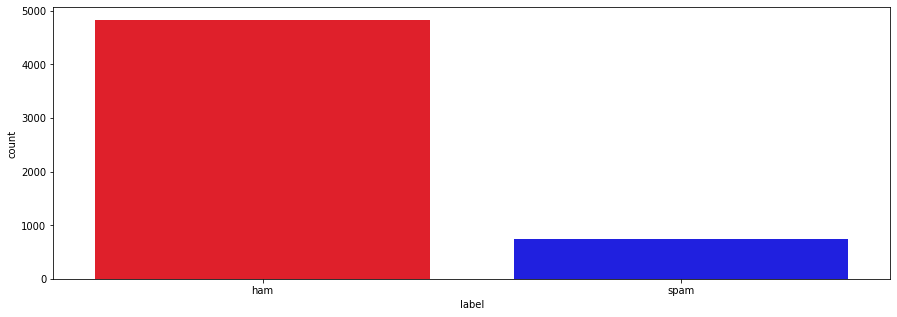

In [6]:
# visualize the distribution of label in graph form
plt.figure(figsize = (15,5))
sns.countplot(x = 'label', data = df, palette=['#FF000F','#0000FF'])
plt.show()

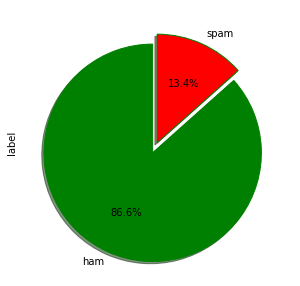

In [7]:
# Also visualize our target variable in PIE chart form
# Creating explode data
explode = (0.1, 0.0)
# Creating color parameters
colors = ( "green", "red", "purple")
  
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }


df['label'].value_counts().plot(kind="pie", figsize=(5,5),startangle=90,shadow=True,autopct="%1.1f%%",explode = explode,
                                   colors=colors,wedgeprops = wp)
plt.show()

In [8]:
# importing the NLP libraries that will be used for preprocessing
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from wordcloud import WordCloud

from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
from nltk.stem import PorterStemmer
ps = PorterStemmer() #creating an instance of the class

In [9]:
def data_cleaning(df,column_name, full_text = False):
    stop_words=stopwords.words("english")
    cleaned_list = []
    for i in df[column_name]:
            res = re.sub(r'[^\w\s]', '', i) # Removing punctuations in string
            words = nltk.word_tokenize(str(res))
            clean_from_digits = [word.lower() for word in words if word.isalnum() if not word.isdigit() if len(word)>2]
            clean = [lemma.lemmatize(word) for word in clean_from_digits if (word not in stop_words) and (len(word)>1)]
            cleaned_list.append(clean)
    final = []
    for i in cleaned_list:
        for j in i:
            final.append(j)
    
    preprocess_cols = []
    if full_text == True:
        for p in cleaned_list:
            preprocess_cols.append(" ".join(p))
        return preprocess_cols
    return final


In [10]:
# function for extracting the most common words in reviews text
def most_common_words(cleaned_col_name_list,common_words = 10):
    fdist = FreqDist(cleaned_col_name_list)
    most_common=fdist.most_common(common_words)
    return most_common

In [11]:
# plotting the graph of most common words
def frequency_dis_graph(cleaned_col_name_list,num_of_words=10):
    fdist = FreqDist(cleaned_col_name_list)
    fdist.plot(num_of_words,cumulative=False)
    plt.show()

In [12]:
# draw a graph of word which are most common
def word_cloud(data):
    unique_string=(" ").join(data)
    wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.savefig("your_file_name"+".png", bbox_inches='tight')
    plt.show()
    plt.close()

In [13]:
# function for words in dataframe format
def table_format(data_list,column_name):
    df_ = pd.DataFrame(data_list, columns = [column_name,'Frequency_distribution'])
    return df_

In [14]:
# calling a function
clean_df = data_cleaning(df, 'email')

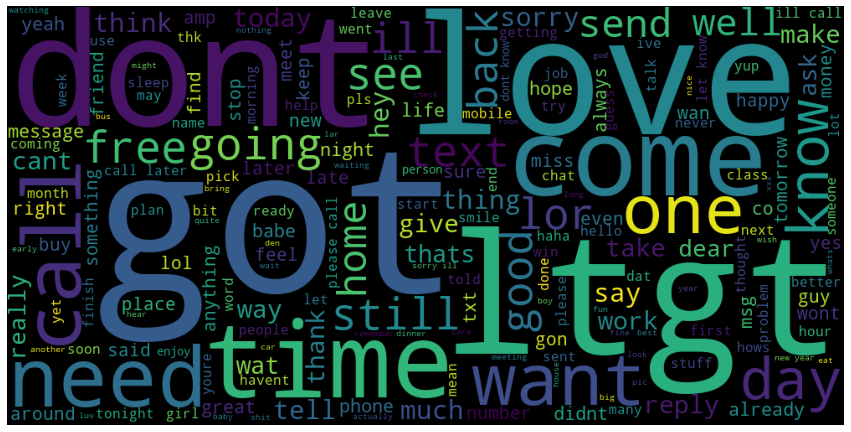

In [15]:
# draw word cloud
word_cloud(clean_df)

In [16]:
# lets try to check the 10 most common words
MCW = most_common_words(clean_df)
table_format(MCW, 'email')

,email,Frequency_distribution
0,call,602
1,get,397
2,dont,298
3,ltgt,276
4,free,275
5,know,267
6,got,251
7,come,250
8,like,247
9,ill,243


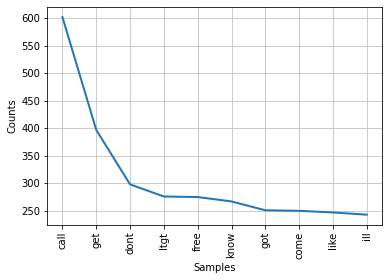

In [17]:
# graph for showing top 10 most common words
frequency_dis_graph(clean_df)

In [18]:
# adding a new column after preprocessing
df['preprocess_text'] = data_cleaning(df, 'email', full_text = True)

In [19]:
# Import classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

import time

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score,classification_report,confusion_matrix

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [20]:
#split data into training and testing set
x_train, x_test, y_train, y_test = train_test_split(df['preprocess_text'], df['label'], test_size=0.2, random_state=0)

In [21]:
# Fit and transform the training data to a document-term matrix using TfidfVectorizer 
tfidf = TfidfVectorizer()
x_train_tfidf = tfidf.fit_transform(x_train.values)
print ("Number of features : %d" %len(tfidf.get_feature_names()))

Number of features : 7196


In [22]:
# function for evaluation metrics precision, recall, f1 etc
def modelEvaluation(predictions, y_test_set, model_name):
    # Print model evaluation to predicted result    
    start_time = time.time()
    print("==========",model_name,"==========")
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test_set, predictions)))
    print ("Precision on validation set: {:.4f}".format(precision_score(y_test_set, predictions, average='macro')))    
    print ("Recall on validation set: {:.4f}".format(recall_score(y_test_set, predictions, average='macro')))
    print ("F1_Score on validation set: {:.4f}".format(f1_score(y_test_set, predictions, average='macro')))
    print ("\nClassification report : \n", classification_report(y_test_set, predictions))
    print ("\nConfusion Matrix : \n", confusion_matrix(y_test_set, predictions))
    cm = confusion_matrix(y_test_set, predictions)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()
    end = round(time.time()-start_time,3)
    results = [accuracy_score(y_test_set, predictions),precision_score(y_test_set, predictions, average='macro'),
              recall_score(y_test_set, predictions, average='macro'),f1_score(y_test_set, predictions, average='macro'),end]
    return results

## Model Building - Logistic Regression

========== logistic Regression ==========

Accuracy on validation set: 0.9605
Precision on validation set: 0.9706
Recall on validation set: 0.8677
F1_Score on validation set: 0.9101

Classification report : 
               precision    recall  f1-score   support

         ham       0.96      1.00      0.98       955
        spam       0.98      0.74      0.84       160

    accuracy                           0.96      1115
   macro avg       0.97      0.87      0.91      1115
weighted avg       0.96      0.96      0.96      1115


Confusion Matrix : 
 [[953   2]
 [ 42 118]]


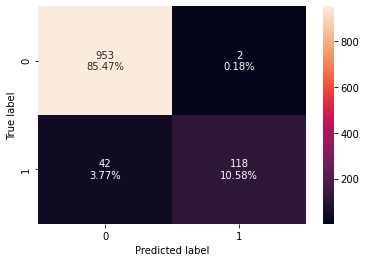

In [23]:
lr = LogisticRegression()
lr.fit(x_train_tfidf, y_train)
predictions = lr.predict(tfidf.transform(x_test))
results_lr = modelEvaluation(predictions, y_test, "logistic Regression")

## Model Building - SVM

========== SVM ==========

Accuracy on validation set: 0.9830
Precision on validation set: 0.9902
Recall on validation set: 0.9406
F1_Score on validation set: 0.9635

Classification report : 
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99       955
        spam       1.00      0.88      0.94       160

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115


Confusion Matrix : 
 [[955   0]
 [ 19 141]]


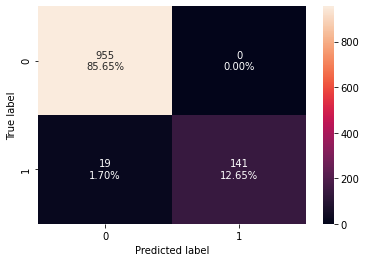

In [24]:
svc = SVC()
svc.fit(x_train_tfidf, y_train)
predictions = svc.predict(tfidf.transform(x_test))
results_svc = modelEvaluation(predictions, y_test, "SVM")

## Model Building - Multinomial Navie Bayes

========== Multinomial NB ==========

Accuracy on validation set: 0.9659
Precision on validation set: 0.9809
Recall on validation set: 0.8812
F1_Score on validation set: 0.9229

Classification report : 
               precision    recall  f1-score   support

         ham       0.96      1.00      0.98       955
        spam       1.00      0.76      0.87       160

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115


Confusion Matrix : 
 [[955   0]
 [ 38 122]]


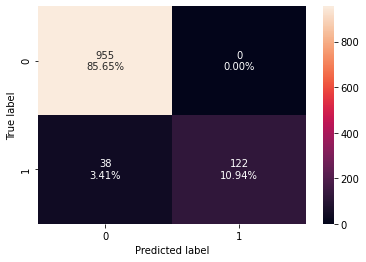

In [25]:
gnb = MultinomialNB()
gnb.fit(x_train_tfidf, y_train)
predictions = gnb.predict(tfidf.transform(x_test))
results_gnb = modelEvaluation(predictions, y_test, "Multinomial NB")

## Model Building - Random Forest

========== RandomForestClassifier ==========

Accuracy on validation set: 0.9803
Precision on validation set: 0.9887
Recall on validation set: 0.9313
F1_Score on validation set: 0.9574

Classification report : 
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99       955
        spam       1.00      0.86      0.93       160

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115


Confusion Matrix : 
 [[955   0]
 [ 22 138]]


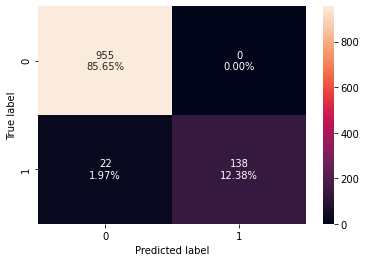

In [26]:
rf = RandomForestClassifier()
rf.fit(x_train_tfidf, y_train)
predictions = rf.predict(tfidf.transform(x_test))
results_rf = modelEvaluation(predictions, y_test, "RandomForestClassifier")

## Model performance evaluation

In [27]:
# showing all models result
dic = {
    'Metrics':['accuracy','precision','recall','f1-score','time detection'],
    'Logistic Regression' : results_lr,
    'SVM' : results_svc,
    'MultinomialNB' : results_gnb,
    'Random Forest' : results_rf,

}
metrics_df = pd.DataFrame(dic)

metrics_df = metrics_df.set_index('Metrics')
# displaying the DataFrame
print(tabulate(metrics_df, headers = 'keys', tablefmt = 'psql'))

+----------------+-----------------------+----------+-----------------+-----------------+
| Metrics        |   Logistic Regression |      SVM |   MultinomialNB |   Random Forest |
|----------------+-----------------------+----------+-----------------+-----------------|
| accuracy       |              0.960538 | 0.98296  |        0.965919 |        0.980269 |
| precision      |              0.970561 | 0.990246 |        0.980866 |        0.988741 |
| recall         |              0.867703 | 0.940625 |        0.88125  |        0.93125  |
| f1-score       |              0.910147 | 0.963514 |        0.922871 |        0.957394 |
| time detection |              0.339    | 0.293    |        0.284    |        0.308    |
+----------------+-----------------------+----------+-----------------+-----------------+


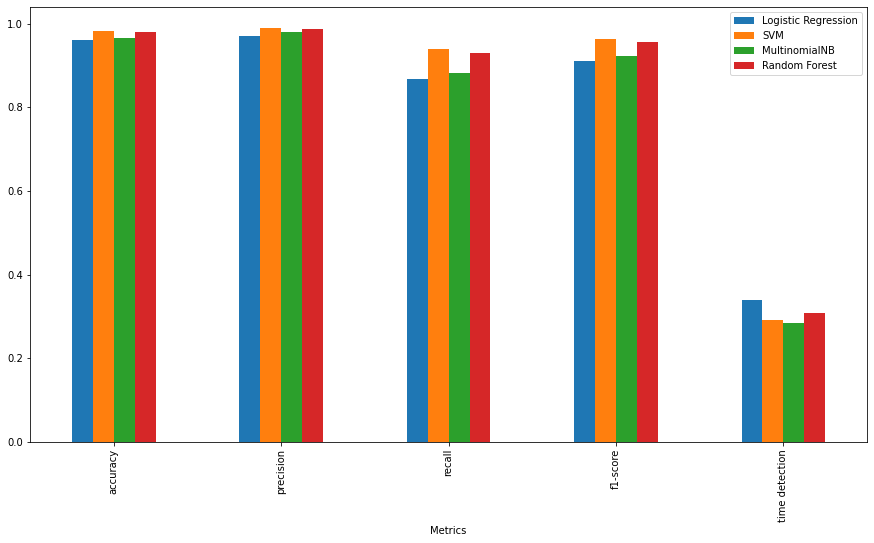

In [28]:
metrics_df.plot(kind='bar', figsize=(15,8))
plt.show()

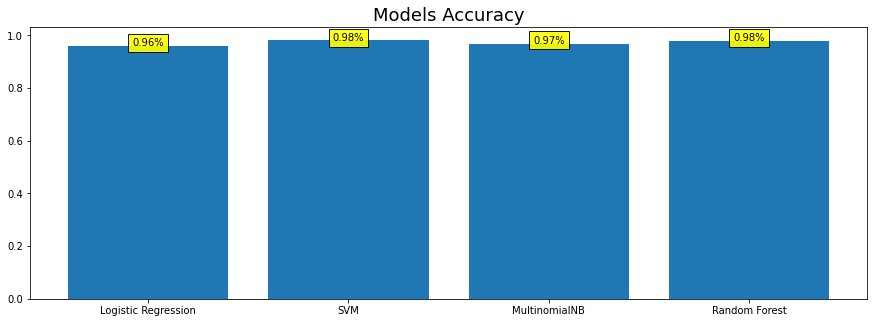

In [29]:
models_acc = metrics_df.iloc[0].tolist()
models_names = metrics_df.columns.tolist()
plt.figure(figsize=(15,5))
plt.bar(models_names,models_acc)
plt.title("Models Accuracy", fontsize=18)

def addLabels(names,acc):
  for i in range(len(names)):
    plt.text(i,round(acc[i],2),f"{round(acc[i],2)}%", ha = 'center', bbox=dict(facecolor='yellow', alpha=0.9))

addLabels(models_names,models_acc)
plt.show()

In [30]:
# we will choose the SVM model for final prediction
def predict_email(email_text):
    predictions = svc.predict(tfidf.transform([email_text]))
    print(f"This is {predictions[0]} email.")


In [31]:
email = 'jurong point crazy available bugis great world buffet cine got amore wat'
predict_email(email)

This is ham email.


In [32]:
email = 'free entry wkly comp win cup final tkts 21st may text receive entry questionstd txt ratetcs apply'
predict_email(email)

This is spam email.
